In [51]:
import pandas as pd

X = pd.read_csv('x_v1.csv').to_numpy()
y = pd.read_csv('target.csv').to_numpy()

batch_size = 32
timesteps = int(X.shape[0] // 32 / 50)

n = X.shape[0] // (batch_size * timesteps) * (batch_size * timesteps)

X = X[:n]
y = y[:n]

X = X.reshape(-1, timesteps, X.shape[1])
y = y.reshape(-1, timesteps)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.metrics import MeanAbsolutePercentageError, MeanAbsoluteError

model = Sequential()

model.add(Input(batch_input_shape=(batch_size, timesteps, X.shape[2],)))
model.add(LSTM(32, stateful=True, return_sequences=True))
model.add(LSTM(32, stateful=True, return_sequences=True))

model.add(Dense(1, activation='relu'))

model.compile(optimizer='nadam', loss='mae', metrics=[MeanAbsolutePercentageError(), MeanAbsoluteError()])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (32, 55, 32)              6656      
                                                                 
 lstm_37 (LSTM)              (32, 55, 32)              8320      
                                                                 
 dense_15 (Dense)            (32, 55, 1)               33        
                                                                 
Total params: 15,009
Trainable params: 15,009
Non-trainable params: 0
_________________________________________________________________


In [71]:
test_size = 0.2

train_X = X[:int(X.shape[0]*(1-test_size))]
train_y = y[:int(X.shape[0]*(1-test_size))]
val_X = X[int(X.shape[0]*(1-test_size)):]
val_y = y[int(X.shape[0]*(1-test_size)):]

train_X.shape, train_y.shape, val_X.shape, val_y.shape

((1280, 55, 19), (1280, 55), (320, 55, 19), (320, 55))

In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

history = model.fit(train_X, train_y, batch_size=batch_size, epochs=1000, validation_data=(val_X, val_y), shuffle=True, 
                    callbacks=[EarlyStopping(patience=10), ReduceLROnPlateau(patience=4, factor=0.5)])

Epoch 1/1000
40/40 [==============================] - 4s 37ms/step - loss: 19.2569 - mean_absolute_percentage_error: 83.9660 - mean_absolute_error: 19.2569 - val_loss: 16.5605 - val_mean_absolute_percentage_error: 69.3065 - val_mean_absolute_error: 16.5605 - lr: 0.0010
Epoch 2/1000
40/40 [==============================] - 1s 22ms/step - loss: 14.9058 - mean_absolute_percentage_error: 61.7476 - mean_absolute_error: 14.9058 - val_loss: 13.9501 - val_mean_absolute_percentage_error: 57.2374 - val_mean_absolute_error: 13.9501 - lr: 0.0010
Epoch 3/1000
40/40 [==============================] - 1s 22ms/step - loss: 13.0494 - mean_absolute_percentage_error: 53.5592 - mean_absolute_error: 13.0494 - val_loss: 12.5158 - val_mean_absolute_percentage_error: 51.3545 - val_mean_absolute_error: 12.5158 - lr: 0.0010
Epoch 4/1000
40/40 [==============================] - 1s 22ms/step - loss: 11.7835 - mean_absolute_percentage_error: 48.6054 - mean_absolute_error: 11.7835 - val_loss: 11.3681 - val_mean_abs

Epoch 32/1000
40/40 [==============================] - 1s 24ms/step - loss: 5.6001 - mean_absolute_percentage_error: 29.3690 - mean_absolute_error: 5.6001 - val_loss: 5.6344 - val_mean_absolute_percentage_error: 28.4168 - val_mean_absolute_error: 5.6344 - lr: 5.0000e-04
Epoch 33/1000
40/40 [==============================] - 1s 23ms/step - loss: 5.4012 - mean_absolute_percentage_error: 27.7467 - mean_absolute_error: 5.4012 - val_loss: 5.4617 - val_mean_absolute_percentage_error: 27.5836 - val_mean_absolute_error: 5.4617 - lr: 5.0000e-04
Epoch 34/1000
40/40 [==============================] - 1s 24ms/step - loss: 5.2930 - mean_absolute_percentage_error: 27.1381 - mean_absolute_error: 5.2930 - val_loss: 5.4069 - val_mean_absolute_percentage_error: 27.6206 - val_mean_absolute_error: 5.4069 - lr: 5.0000e-04
Epoch 35/1000
40/40 [==============================] - 1s 24ms/step - loss: 5.2617 - mean_absolute_percentage_error: 27.1785 - mean_absolute_error: 5.2617 - val_loss: 5.3229 - val_mean_ab

40/40 [==============================] - 1s 24ms/step - loss: 4.4310 - mean_absolute_percentage_error: 23.6238 - mean_absolute_error: 4.4310 - val_loss: 4.5810 - val_mean_absolute_percentage_error: 24.9668 - val_mean_absolute_error: 4.5810 - lr: 5.0000e-04
Epoch 63/1000
40/40 [==============================] - 1s 24ms/step - loss: 4.4074 - mean_absolute_percentage_error: 23.5120 - mean_absolute_error: 4.4074 - val_loss: 4.5552 - val_mean_absolute_percentage_error: 24.8296 - val_mean_absolute_error: 4.5552 - lr: 5.0000e-04
Epoch 64/1000
40/40 [==============================] - 1s 23ms/step - loss: 4.4172 - mean_absolute_percentage_error: 23.5625 - mean_absolute_error: 4.4172 - val_loss: 4.6243 - val_mean_absolute_percentage_error: 25.7090 - val_mean_absolute_error: 4.6243 - lr: 5.0000e-04
Epoch 65/1000
40/40 [==============================] - 1s 23ms/step - loss: 4.3735 - mean_absolute_percentage_error: 23.3478 - mean_absolute_error: 4.3735 - val_loss: 4.5476 - val_mean_absolute_percent

10/10 [==============================] - 0s 10ms/step


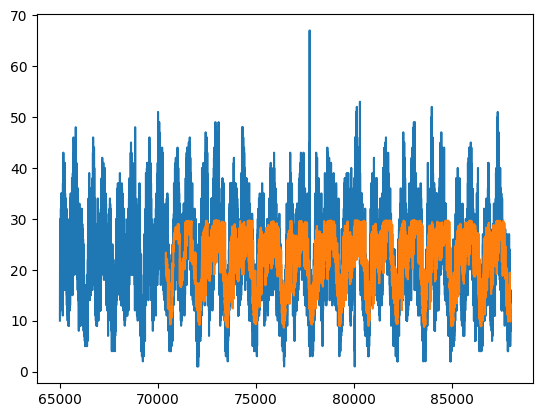

In [85]:
import matplotlib.pyplot as plt
import numpy as np

x_len = X.shape[0]*X.shape[1]
val_len = val_X.shape[0]*val_X.shape[1]

plt.plot(np.arange(x_len)[65000:], y.reshape(-1)[65000:])
plt.plot(np.arange(train_len, train_len+val_len), model.predict(val_X).reshape(-1))